In [1]:
import numpy as np
from Kinematics import *

In [8]:
M2 = DD_KineBody(CenterOfGravityPos=[0.09105,0],Mass=2.64,RotationalInertiaZZ=0.0064559)
M2.AddLocalPointsToBody([[0,0],[0.171296,0]])
M2.Theta = 3*np.pi/4

M3 = DD_KineBody(CenterOfGravityPos=[0.42824,0],Mass=13.201,RotationalInertiaZZ=0.80699)
M3.AddLocalPointsToBody([[0,0],[0.856479,0]])
M3.Theta = -np.pi/6


M4 = DD_KineBody(CenterOfGravityPos=[0.125,0],Mass=3.853,RotationalInertiaZZ=0.02007)
M4.AddLocalPointsToBody([[0,0],[0.25,0]])
M4.Theta = np.pi/6


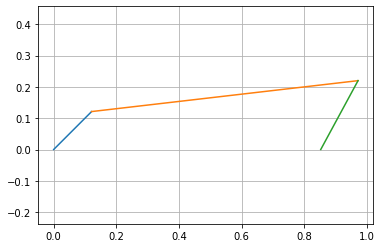

In [9]:
Q1sys = KinematicSystem()
Q1sys.AddComponnentsToSystem([M2,M3,M4])

Q1sys.SetFixedPoints(M2,0,PointPosition=[0,0])
Q1sys.SetFixedPoints(M4,0,PointPosition=[0.85285,0])

Q1sys.SetConnectComponents(M2,M3,1,0)
Q1sys.SetConnectComponents(M3,M4,1,1)

Q1sys.SetAngleComponent(M2,np.pi/4)


Q1sys.SolvePositions()

plt.figure()
Q1sys.BodyPlotStack()
plt.grid()
plt.axis('equal')
plt.show()

e:\OneDrive\ENGINEERING\01-ENGINEERING TOOLS\env\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


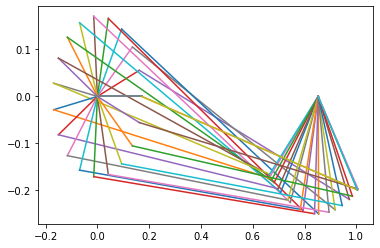

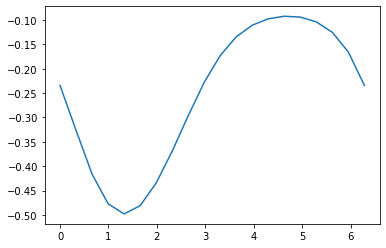

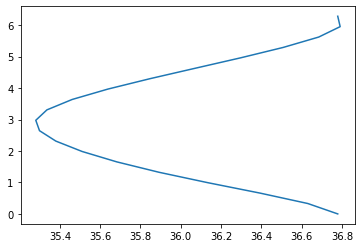

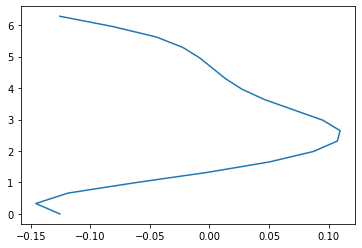

In [14]:
theta2 = np.linspace(0,2*np.pi,20)
theta3 =[]
theta4 = []

omega2 = []
omega3 = []
omega4 = []


plt.figure()

for i in theta2:
    Q1sys.BCBodyAngle = []
    Q1sys.BCBodyAngleVelocity = []
    Q1sys.SetAngleComponent(M2,i)
    Q1sys.SetAngularVelocityComponent(M2,0.5)

    Q1sys.SolvePositions()
    Q1sys.SolveVelocities()

    theta3.append(M3.Theta)
    theta4.append(M4.Theta)

    Q1sys.BodyPlotStack()

    omega2.append(M2.ThetaD)
    omega3.append(M3.ThetaD)
    omega4.append(M4.ThetaD)



plt.show()

plt.figure()
plt.plot(theta2,theta3)
plt.show()

plt.figure()
plt.plot(theta4,theta2)
plt.show()

plt.figure()
plt.plot(omega3,theta2)
plt.show()